In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random
from IPython import display
from scipy.signal import savgol_filter

In [2]:
pwd


'C:\\Users\\shakh'

In [3]:
df = pd.read_csv('E:\\CVPR\\Assignment\\MID\\data.csv')
df.head()

,x1,x2,y
0,38,66,1
1,98,82,0
2,47,89,1
3,42,53,1
4,30,34,1


[38, 98, 47, 42, 30, 49, 7, 96, 61, 44, 20, 38, 66, 70, 40, 82, 54, 71, 70, 78, 81, 97, 40, 66, 58, 61, 45, 43, 73, 11, 7, 68, 77, 3, 97, 3, 79, 9, 8, 79, 97, 1, 65, 34, 41, 92, 17, 39, 34, 81]
[66, 82, 89, 53, 34, 41, 75, 90, 87, 54, 90, 48, 52, 88, 60, 98, 15, 6, 34, 6, 52, 75, 99, 40, 17, 12, 58, 49, 84, 72, 76, 77, 97, 74, 19, 22, 71, 78, 52, 46, 3, 78, 83, 20, 0, 0, 61, 21, 74, 88]


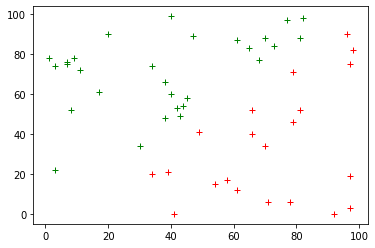

In [4]:



x1 = df['x1'].values.tolist()
print(x1)
x2 = df['x2'].values.tolist()
print(x2)
y = df['y'].values.tolist()

for i in range(len(y)):
    if y[i] == 0:
        plt.plot(x1[i], x2[i], "r+")
    else:
        plt.plot(x1[i], x2[i], "g+")





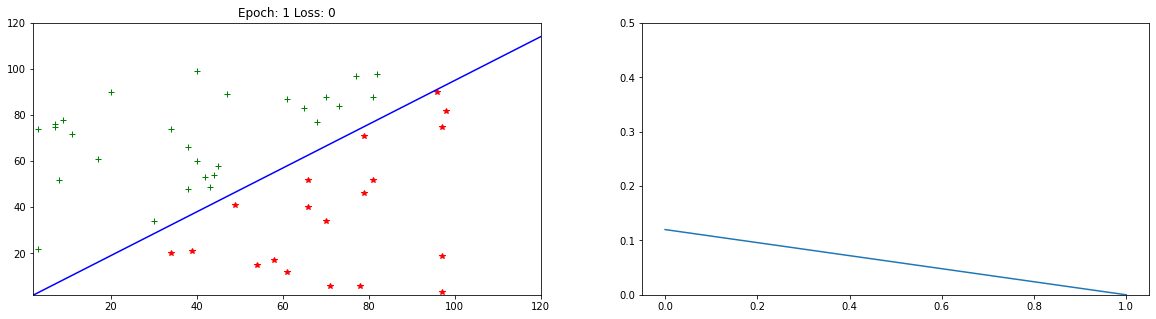

In [5]:
w = [random.random(), random.random()]
b = random.random()
lr = 0.1
theta = 0.5
epoch = 0
count = 0
loss = []

while count < len(y):
    
    total_error = 0
    
    for i in range(len(y)):
        ws = w[0]*x1[i] + w[1]*x2[i] + b
        pred = 0
        if ws > theta:
            pred = 1
            
        error = y[i] - pred
        
        if error != 0:
            
            count = 0
            
            total_error += math.sqrt(error**2)
            
            w[0] += lr*error*x1[i]
            w[1] += lr*error*x2[i]
            b += lr*error
            
        else:
            count += 1
            
    loss.append(1/len(x1)*total_error)
    
    grf = plt.figure(figsize=(20,5))
    ax =grf.add_subplot(1,2,1)
    
    display.clear_output(wait=True)
    
    for i in range(len(y)):
        if y[i] == 0:
            plt.plot(x1[i], x2[i], 'r*')
        else:
            plt.plot(x1[i], x2[i], 'g+')
        
        plt.xlim([2,120])
        plt.ylim([2,120])
        
        xint = (theta-b)/ w[0]
        yint = (theta-b)/ w[1]
        slope = -yint/xint
        X = plt.xlim()
        Y = []
        for i in X:
            Y.append(slope*i + yint)
            
    plt.plot(X,Y, 'b-')
    
    plt.title(f"Epoch: {epoch} Loss: {total_error}")
    plt.subplot(1,2,2)
    plt.plot(loss)
    if epoch > 20:
        avg = savgol_filter(loss, 15, 3)
        plt.plot(avg, 'r--', lw=5)
    
    plt.ylim([0,0.5])
    plt.show()
    epoch += 1